In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv("data.csv").drop(columns = ['Unnamed: 0'])

In [8]:
numeric_data = data.select_dtypes(include=['float64', 'int64']).drop(columns = ["proyecto_id"])

In [10]:
numeric_data.fillna(numeric_data.mean(), inplace=True)

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [14]:
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

In [15]:
explained_variance_ratio = pca.explained_variance_ratio_

In [17]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

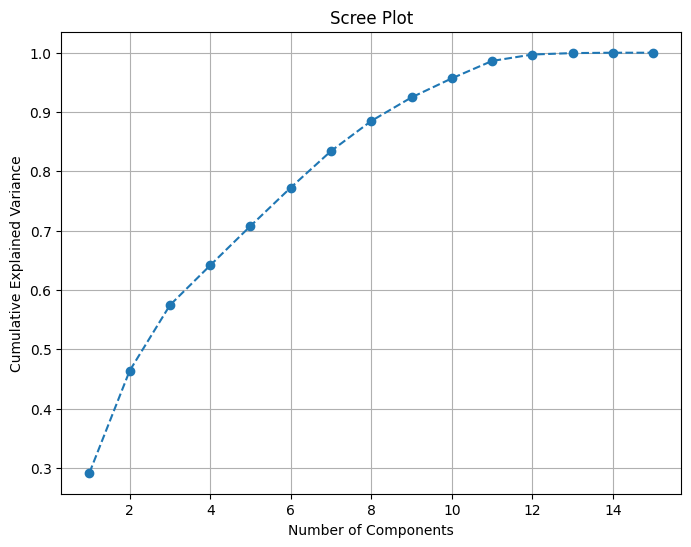

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

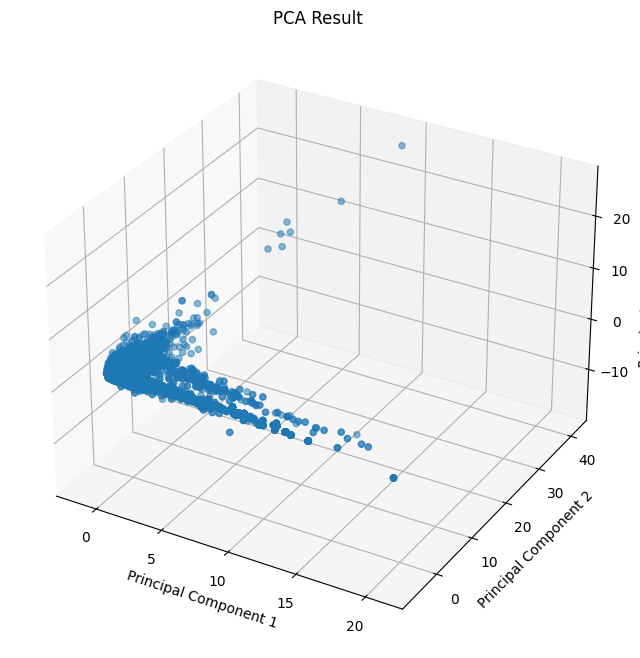

In [27]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

pc1 = pca_result[:, 0]
pc2 = pca_result[:, 1]
pc3 = pca_result[:, 2]

scatter = ax.scatter(pc1, pc2, pc3, alpha=0.5)

ax.set_title('PCA Result')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

ax.grid(True)

plt.show()

In [21]:
loadings = pca.components_

In [25]:
num_components_to_display = 3
component_loadings = loadings[:num_components_to_display, :]

for component_idx in range(num_components_to_display):
    print(f'Principal Component {component_idx + 1} Loadings:')
    for i, variable in enumerate(variables):
        print(f'{variable}: {component_loadings[component_idx, i]:.3f}')
    print('-' * 50)

Principal Component 1 Loadings:
monto_total_solicitado: 0.123
monto_total_adjudicado: 0.112
cantidad_miembros_F: 0.441
cantidad_miembros_M: 0.450
year: 0.015
amount_requested_awarded_difference: -0.032
amount_of_benefactors: 0.014
unkowns: -0.011
directores: 0.103
investigadores: 0.442
becarios: 0.090
estudiantes: -0.029
personales_tecnico_de_apoyo: 0.369
co_directores: -0.013
total_personel: 0.472
--------------------------------------------------
Principal Component 2 Loadings:
monto_total_solicitado: 0.504
monto_total_adjudicado: 0.512
cantidad_miembros_F: -0.006
cantidad_miembros_M: -0.126
year: 0.341
amount_requested_awarded_difference: -0.114
amount_of_benefactors: 0.008
unkowns: 0.078
directores: 0.354
investigadores: -0.106
becarios: 0.337
estudiantes: 0.056
personales_tecnico_de_apoyo: -0.148
co_directores: 0.230
total_personel: -0.060
--------------------------------------------------
Principal Component 3 Loadings:
monto_total_solicitado: 0.316
monto_total_adjudicado: 0.319
